 # EDA

In [0]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from datetime import datetime, date, time, timedelta
import matplotlib.gridspec as gridspec
import plotly.figure_factory as ff

In [0]:
train_transaction = pd.read_csv("train_transaction.csv")

In [0]:
test_transaction = pd.read_csv("test_transaction.csv")

In [0]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Going with max timeframe as 15811131
Min timeframe as 86400


[501155  18101]


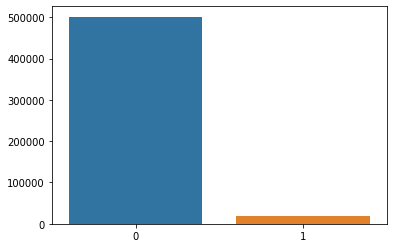

In [0]:
x = train_transaction['isFraud'].value_counts().values
print(x)
sns.barplot([0,1], x)

In [0]:
train_identity = pd.read_csv("train_identity.csv")

In [0]:
train =  train_transaction.merge(train_identity, how="left", left_index=True, right_index=True)

In [0]:
train.isna().sum()

TransactionID_x         0
isFraud                 0
TransactionDT           0
TransactionAmt          0
ProductCD               0
                    ...  
id_36              378271
id_37              378271
id_38              378271
DeviceType         378446
DeviceInfo         400590
Length: 435, dtype: int64

In [0]:
y_train = train_transaction['isFraud'].copy()

In [0]:
x_train =  train_transaction.drop('isFraud', axis=1)

In [0]:
x_train.select_dtypes(['object']).columns

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'],
      dtype='object')

In [1]:
# f, axes = plt.subplots(4,4, figsize =(24, 30))
# obj_columns = ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
#        'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
#        'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
#        'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
#        'DeviceInfo']
# row, col, index = 0, 0, 0
# for i in range(6):
#   for j in range(4):
#     sns.countplot(x=obj_columns[index], data=x_train, hue=y_train, ax=axes[i][j])
#     index = index + 1
# plt.tight_layout()

In [0]:
#### Time calculation
print(train_transaction['TransactionDT'].max())
print(train_transaction['TransactionDT'].min())
time_span = (15811131 - 86400)/(3600*24)
print("No of Days:", time_span)


1625545
86400
No of Days: 181.99920138888888


In [0]:
### launched in July, assuming 6 months before data. Taking the start date as 1st Dec, 2018
start_Date = '2018-12-01'

In [0]:
startdate = datetime.strptime(start_Date, "%Y-%m-%d")
train_transaction['TransactionDT1'] = train_transaction['TransactionDT'].apply(lambda time_span: (startdate + timedelta(seconds = time_span)))

In [0]:
print(train_transaction['TransactionDT1'].head())
# print(train_transaction['TransactionDT'].tail())

0   2018-12-02 00:00:00
1   2018-12-02 00:00:01
2   2018-12-02 00:01:09
3   2018-12-02 00:01:39
4   2018-12-02 00:01:46
Name: TransactionDT1, dtype: datetime64[ns]


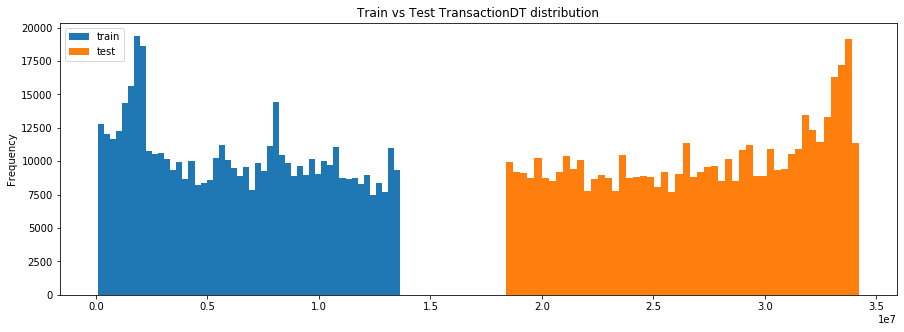

In [0]:
train_transaction['TransactionDT'].plot(kind='hist',
                                        figsize=(15, 5),
                                        label='train',
                                        bins=50,
                                        title='Train vs Test TransactionDT distribution')
test_transaction['TransactionDT'].plot(kind='hist',
                                       label='test',
                                       bins=50)
plt.legend()
plt.show()

In [0]:
tot_count = train_transaction['TransactionDT'].count()

[0.20548893 0.21030131 0.21088876 ... 3.101114   3.10171842 3.10173996]
[0.16733716 0.16734874 0.16813546 ... 3.10192207 3.10194053 3.10194791]


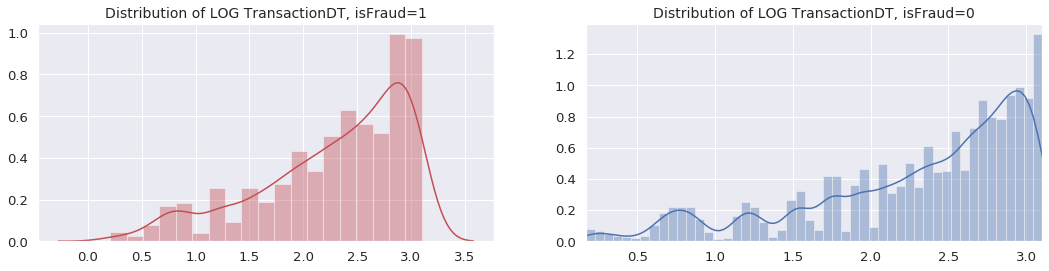

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

time_val = np.log((train_transaction.loc[train_transaction['isFraud'] == 1]['TransactionDT'].values)/tot_count)
print(time_val)
sns.distplot((time_val), ax=ax[0], color='r')
ax[0].set_title('Distribution of LOG TransactionDT, isFraud=1', fontsize=14)
ax[1].set_xlim([min((time_val)), max((time_val))])


time_val = np.log((train_transaction.loc[train_transaction['isFraud'] == 0]['TransactionDT'].values)/tot_count)
print(time_val)
sns.distplot((time_val), ax=ax[1], color='b')
ax[1].set_title('Distribution of LOG TransactionDT, isFraud=0', fontsize=14)
ax[1].set_xlim([min((time_val)), max((time_val))])


plt.show()

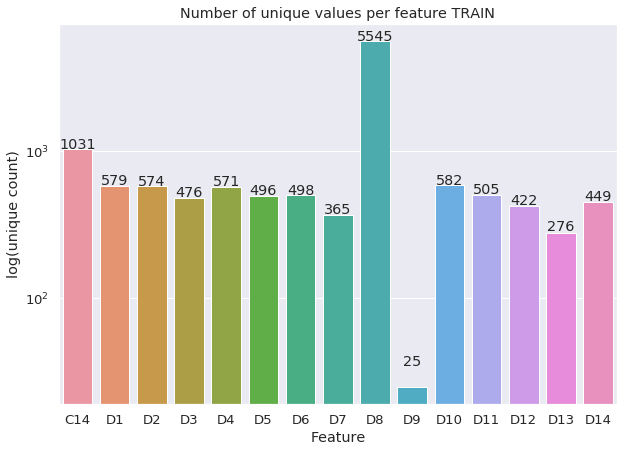

In [0]:
### Unique values for D features
plt.figure(figsize=(10, 7))
d_features = list(train_transaction.columns[30:45])
uniques = [len(train_transaction[col].unique()) for col in d_features]
sns.set(font_scale=1.2)
ax = sns.barplot(d_features, uniques, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature TRAIN')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center")

(1001, 18395)

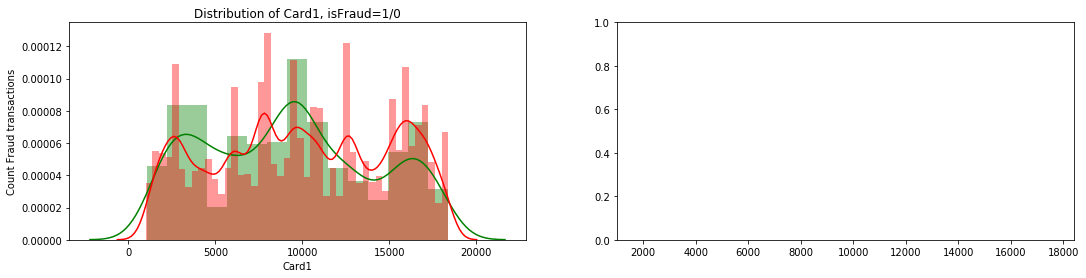

In [0]:
### Card1 details

fig, ax = plt.subplots(1, 2, figsize=(18,4))

card1_value1 = (train_transaction.loc[train_transaction['isFraud'] == 1]['card1'].values)
sns.distplot((card1_value1), ax=ax[0], color='g')
# ax[0].set_title('Distribution of Card1, isFraud=1/0', fontsize=14)
ax[1].set_xlim([min((card1_value1)), max((card1_value1))])
ax[0].set(xlabel='Card1', ylabel='Count Fraud transactions', title='Distribution of Card1, isFraud=1/0')

card1_value0 = (train_transaction.loc[train_transaction['isFraud'] == 0]['card1'].values)
sns.distplot((card1_value0), ax=ax[0], color='r')
# ax[0].set_title('Distribution of Card1, isFraud=0', fontsize=14)
ax[1].set_xlim([min((card1_value0)), max((card1_value0))])

In [0]:
train_transaction.dropna(subset=['card3'], inplace=True)

In [0]:
train_transaction['card3'].isna().sum()

0

(100.0, 237.0)

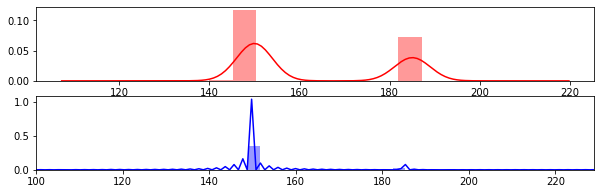

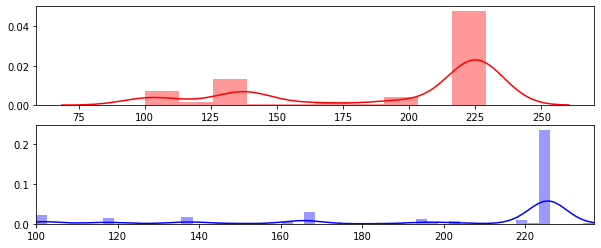

In [0]:
### Card3 details

fig, ax = plt.subplots(2, 1, figsize=(10,3))

card3_value1 = (train_transaction.loc[train_transaction['isFraud'] == 1]['card3'].values)
sns.distplot((card3_value1), ax=ax[0], color='r')
# ax[0].set(xlabel='Card3', ylabel='Count Fraud transactions', title='Distribution of Card3, isFraud=1')
ax[1].set_xlim([min((card3_value1)), max((card3_value1))])

card3_value0 = (train_transaction.loc[train_transaction['isFraud'] == 0]['card3'].values)
sns.distplot((card3_value0), ax=ax[1], color='b')
# ax[1].set(xlabel='Card3', ylabel='Count Fraud transactions', title='Distribution of Card3, isFraud=1')
ax[1].set_xlim([min((card3_value0)), max((card3_value0))])

### Card5 details
train_transaction.dropna(subset=['card5'], inplace=True)

fig, ax = plt.subplots(2, 1, figsize=(10,4))

card3_value1 = (train_transaction.loc[train_transaction['isFraud'] == 1]['card5'].values)
sns.distplot((card3_value1), ax=ax[0], color='r')
# ax[0].set(xlabel='Card3', ylabel='Count Fraud transactions', title='Distribution of Card3, isFraud=1')
ax[1].set_xlim([min((card3_value1)), max((card3_value1))])

card3_value0 = (train_transaction.loc[train_transaction['isFraud'] == 0]['card5'].values)
sns.distplot((card3_value0), ax=ax[1], color='b')
# ax[1].set(xlabel='Card3', ylabel='Count Fraud transactions', title='Distribution of Card3, isFraud=1')
ax[1].set_xlim([min((card3_value0)), max((card3_value0))])



(100.0, 237.0)

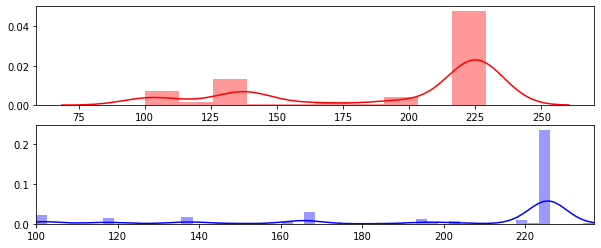

In [0]:
### Card5 details
train_transaction.dropna(subset=['card5'], inplace=True)

fig, ax = plt.subplots(2, 1, figsize=(10,4))

card3_value1 = (train_transaction.loc[train_transaction['isFraud'] == 1]['card5'].values)
sns.distplot((card3_value1), ax=ax[0], color='r')
# ax[0].set(xlabel='Card3', ylabel='Count Fraud transactions', title='Distribution of Card3, isFraud=1')
ax[1].set_xlim([min((card3_value1)), max((card3_value1))])

card3_value0 = (train_transaction.loc[train_transaction['isFraud'] == 0]['card5'].values)
sns.distplot((card3_value0), ax=ax[1], color='b')
# ax[1].set(xlabel='Card3', ylabel='Count Fraud transactions', title='Distribution of Card3, isFraud=1')
ax[1].set_xlim([min((card3_value0)), max((card3_value0))])



In [0]:
train_transaction.corr().head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
TransactionID,1.000000,-0.006477,0.999182,-0.011441,0.003136,0.042881,0.024676,-0.003380,-0.008297,0.026809,0.003843,-0.015527,0.075864,0.075344,-0.004896,0.080128,-0.029938,0.076982,0.073650,0.076838,-0.032385,0.075752,0.076542,0.073592,0.060792,0.074610,-0.066882,-0.011160,0.012635,-0.069059,0.029519,-0.029826,0.006703,0.004288,0.033295,-0.027586,-0.046658,-0.046627,-0.029301,-0.026437,...,0.011916,0.012416,0.202341,0.175379,0.196708,-0.004961,-0.012673,-0.013810,-0.017538,-0.016886,-0.032494,-0.007784,-0.022095,-0.016664,-0.024200,-0.020611,-0.020180,-0.008381,-0.017796,-0.002053,-0.004353,-0.001726,-0.016186,-0.035489,-0.029564,-0.007188,-0.036693,-0.038536,0.010786,-0.008695,0.013278,0.019846,0.001421,0.018651,0.012546,-0.022454,-0.002173,0.021799,0.008608,0.025362
isFraud,-0.006477,1.000000,-0.006873,0.008296,-0.019491,-0.007603,0.150822,-0.037965,-0.011772,-0.086944,0.012174,-0.007689,0.067381,0.071659,-0.016597,0.068923,-0.027905,0.065902,0.069924,0.069358,-0.026707,0.071021,0.068186,0.070708,0.055793,0.061888,-0.045644,-0.084010,-0.048460,-0.059243,-0.061856,-0.029479,-0.144185,-0.117580,-0.021763,-0.065110,-0.048226,0.007271,-0.048144,-0.004639,...,0.018492,0.024841,0.060477,0.084899,0.075109,-0.000869,0.022596,0.068390,0.061086,0.028936,0.015948,-0.003092,0.047027,0.033586,0.035769,0.036161,0.043560,0.071545,0.070912,-0.000796,0.011774,0.001789,0.023045,0.019312,0.027478,0.003434,0.010271,0.010124,0.006440,0.002313,0.007111,0.010991,0.010253,0.014167,0.002046,0.011527,0.010982,0.009873,0.007291,0.008915
TransactionDT,0.999182,-0.006873,1.000000,-0.010391,0.003468,0.043961,0.022836,-0.002957,-0.008463,0.023045,0.004029,-0.015061,0.078458,0.078105,-0.003970,0.082901,-0.030308,0.079726,0.076468,0.079628,-0.032639,0.078712,0.079280,0.076375,0.063472,0.077326,-0.067100,-0.011050,0.012756,-0.069545,0.030128,-0.028106,0.009335,0.007212,0.044265,-0.026522,-0.048317,-0.044413,-0.028406,-0.026182,...,0.011980,0.012408,0.203949,0.176657,0.198232,-0.004926,-0.012686,-0.013461,-0.017360,-0.016861,-0.031962,-0.007601,-0.021536,-0.016231,-0.023704,-0.020144,-0.020655,-0.008180,-0.017857,-0.001838,-0.004065,-0.001515,-0.015658,-0.034936,-0.028761,-0.006926,-0.036503,-0.038074,0.010680,-0.008330,0.013260,0.019596,0.001936,0.018752,0.013227,-0.022016,-0.001421,0.021960,0.009312,0.025600
TransactionAmt,-0.011441,0.008296,-0.010391,1.000000,-0.010393,0.005865,-0.107636,-0.010661,-0.011423,0.070351,0.037348,0.013425,-0.044488,-0.046456,-0.025098,-0.042140,-0.027783,-0.044792,-0.047220,-0.045151,-0.027755,-0.047104,-0.045341,-0.047077,-0.056550,-0.046682,-0.020091,0.020447,0.007486,-0.045000,0.023756,0.072026,0.189054,0.054030,0.055839,-0.045994,-0.104057,-0.056990,0.081204,0.101395,...,0.043279,0.041389,-0.117263,-0.115169,-0.117646,0.000087,0.134468,0.070727,0.121135,0.147925,0.124067,0.129926,0.142816,0.173903,0.129026,0.161707,0.132311,0.032207,0.074341,0.063794,0.076392,0.070976,0.124868,0.001531,0.071152,0.025961,-0.056924,-0.036013,0.090889,0.050490,0.092494,0.409037,0.265689,0.402849,0.192160,0.101226,0.171023,0.295923,0.268776,0.312258
card1,0.003136,-0.019491,0.003468,-0.010393,1.000000,-0.009184,-0.003322,-0.077770,0.019758,-0.003197,0.004062,0.010661,0.014432,0.014645,-0.005320,0.014180,0.010408,0.015637,0.013694,0.013585,0.011499,0.014004,0.014879,0.013472,0.015883,0.015877,-0.001962,0.005113,-0.015245,-0.012655,-0.018634,-0.041167,-0.017768,-0.002432,0.000684,0.001911,-0.020382,-0.038533,-0.036442,0.006132,...,-0.002429,0.002386,-0.004562,-0.006707,-0.005004,-0.003154,0.003021,0.017133,0.011347,-0.005822,0.003193,-0.010133,0.002585,0

In [0]:
train_transaction.loc[:, ['V319', 'V320','V321']].head(30)

,V319,V320,V321
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000


In [0]:
train_transaction["diff_V319_V320"] = np.zeros(train_transaction.shape[0])
train_transaction["diff_V320_V321"] = np.zeros(train_transaction.shape[0])
train_transaction["diff_V319_V321"] = np.zeros(train_transaction.shape[0])

In [0]:
len(train_transaction[(train_transaction["V319"]!=train_transaction["V320"])])/train_transaction.shape[0]

0.03142829778209531

In [0]:
train_transaction[(train_transaction["V319"]!=train_transaction["V320"])].head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,diff_V319_V320,diff_V320_V321,diff_V319_V321
19,2987019,0,86730,186.000,W,7005,111.0,150.0,visa,226.0,debit,264.0,87.0,NaN,NaN,gmail.com,NaN,2.0,5.0,0.0,0.0,0.0,7.0,0.0,0.0,2.0,0.0,2.0,0.0,25.0,2.0,62.0,62.0,2.0,35.0,2.0,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,663.500000,102.500000,0.0,425.000000,0.0,34.000000,0.000000,93.000000,0.000000,0.0,68.5,68.5,0.0,170.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
55,2987055,0,87413,210.950,W,3670,111.0,150.0,visa,226.0,debit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,21.0,21.0,20.0,20.0,20.0,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,421.899994,0.000000,0.0,210.949997,0.0,0.000000,210.949997,210.949997,210.949997,0.0,0.0,0.0,0.0,210.949997,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
105,2987105,0,88229,5.075,C,15885,545.0,185.0,visa,138.0,debit,NaN,NaN,NaN,NaN,gmail.com,gmail.com,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,1.0,1.0,21.0,NaN,21.0,0.0,NaN,0.0,NaN,NaN,NaN,...,2.0,1.0,1.0,0.0,5.075300,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,5.075300,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
151,2987151,0,88897,49.000,W,12577,268.0,150.0,visa,166.0,debit,184.0,87.0,NaN,NaN,gmail.com,NaN,16.0,16.0,0.0,0.0,10.0,12.0,0.0,0.0,9.0,0.0,13.0,0.0,52.0,10.0,239.0,239.0,1.0,426.0,15.0,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,330.399994,47.950001,0.0,273.399994,0.0,47.950001,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,57.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
214,2987214,0,89878,99.000,W,5033,269.0,150.0,mastercard,224.0,debit,337.0,87.0,80.0,NaN,aol.com,NaN,3.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,2.0,11.0,NaN,4.0,4.0,2.0,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,153.000000,104.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,113.0,64.0,0.0,40.000000,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [0]:
train_transaction.groupby("diff_V319_V320").mean().isFraud

diff_V319_V320
0.0    0.026845
Name: isFraud, dtype: float64